In [776]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import seaborn as sns

import us
from datetime import datetime, timezone

pd.set_option('display.max_columns', 999)

In [777]:
data_path = "C:/Users/armcl/Python/Springboard_Cap2/Data/" #Home
#data_path = "C:/Users/yyzhao/python/Springboard/Capstone2/Data/" #Work

In [778]:
#Read customers data
customers = pd.read_csv(data_path + "Subscription/customers.csv", encoding="utf8")

customers = customers.drop(columns = ['note','ship_street','ship_unit','location',
                                     'wrr','last4','source','customer_metadata',
                                     'ship_phone_number'])

#revenue and mrr need to be divided by 100
customers[['total_revenue','mrr']] = customers[['total_revenue','mrr']]/100

#some observations are missing location data, # of orders, and might have wrong name
#will investigate once merged with other data


In [779]:
#mrr: monthly recurring revenue
#mixed subscription status: once subscribed, cancelled, subscribed again
customers.head(2)

,customer_id,first_name,last_name,american,name,email,ship_to,ship_city,ship_state,ship_zip_code,ship_country,country,total_revenue,mrr,num_orders,num_subscriptions,subscription_status,payment_provider,marketplace_source
0,2739202452,Jennifer,Ting,0,Jennifer Ting,muchenting@hotmail.com,Jennifer Ting,San Ramon,CA,94583,US,US,275.0,23.75,1,1,active,STRIPE,False
1,2729781565,Caelyn,Furman,1,Caelyn Furman,caelyn.furman@gmail.com,Caelyn Furman,Avondale Esates,GA,30002,US,US,185.9,0.00,2,0,none,STRIPE,False


In [780]:
customers.shape

(1320, 19)

In [781]:
customers.describe()

,customer_id,american,total_revenue,mrr,num_orders,num_subscriptions
count,1.320000e+03,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,2.053670e+09,0.053030,129.265508,6.450795,3.173485,1.017424
std,3.030278e+08,0.224179,172.433666,11.453050,3.426392,0.555215
min,7.880641e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.864414e+09,0.000000,17.960000,0.000000,1.000000,1.000000
50%,1.937069e+09,0.000000,52.875000,0.000000,2.000000,1.000000
75%,2.279912e+09,0.000000,197.770000,20.900000,4.000000,1.000000
max,2.739202e+09,1.000000,1468.920000,95.000000,22.000000,5.000000


In [782]:
##More avg revenue from American families need to focus more on this market
#Analyze state
family_analysis = pd.DataFrame({'count' : customers.groupby( [ 'american'] ).size()})
family_analysis['avg_revenue']=customers.groupby('american').mean()['total_revenue']
family_analysis['total_revenue']= family_analysis['count']*family_analysis['avg_revenue']
family_analysis.sort_values('total_revenue', ascending=False)

,count,avg_revenue,total_revenue
american,,,
0,1250,126.351360,157939.20
1,70,181.303857,12691.27


In [783]:
#Analyze state
state_analysis = pd.DataFrame({'count' : customers.groupby( [ 'ship_state'] ).size()})
state_analysis['avg_revenue']=customers.groupby('ship_state').mean()['total_revenue']
state_analysis['total_revenue']= state_analysis['count']*state_analysis['avg_revenue']
state_analysis.sort_values('total_revenue', ascending=False)

,count,avg_revenue,total_revenue
ship_state,,,
CA,503,114.867256,57778.23
WA,121,137.580826,16647.28
TX,82,180.316951,14785.99
NY,95,129.835158,12334.34
NJ,54,149.992963,8099.62
OH,34,201.547647,6852.62
PA,45,145.669111,6555.11
MA,39,161.445385,6296.37
MD,41,139.972195,5738.86


In [784]:
#More revenue from American families need to focus more on this market
customers.groupby('american').mean()

,customer_id,total_revenue,mrr,num_orders,num_subscriptions,marketplace_source
american,,,,,,
0,2.056710e+09,126.351360,6.374573,3.1664,1.016800,0.002400
1,1.999398e+09,181.303857,7.811905,3.3000,1.028571,0.042857


In [785]:
payment_count = customers.groupby('payment_provider').size()

payment_count/payment_count.sum()

payment_provider
PAYPAL    0.307692
STRIPE    0.692308
dtype: float64

In [786]:
#sub_status = customers.groupby('subscription_status').size()

#sub_status/sub_status.sum()

In [787]:
#Median Revenue by Subscription Status
#Mixed shows the highest total revenue and num of orders, there are many reasons:
#1) clients subscribed, cancelled(didn't like at first, on vacation), came back and subscribed again
#2) accidentally ordered more than needed and cancelled
#3) clients ordered gifts for friends and cancelled/expired later
#4) currently cancelled and there were expired gifts
#5) clients tried several ages first and decided to keep one that fits child's age

#It's hard to interpret with all these different factors
#Need to combine with subscription and cancellation reason data for better information
#For example: cancelled+active vs. cancelled+expired
#customers.groupby('subscription_status').mean()

In [788]:
#Subscription Data

#Use email to merge
#Fullfillment status == 'cancelled': this probably means 
#1)when total_revenue = 0: accidental orders
#2)when total_revenue is not 0 and refunded mad customers

#Date, need to convert to local time for timing analysis, default is PDT
#Questions like1) what time do peoplel like to subscribe/cancel 2)when do they like to open emails and take actions

subscriptions = pd.read_csv(data_path + "Subscription/subscriptions.csv", encoding="utf8")

#Drop columns with all NAs
subscriptions = subscriptions.dropna(axis=1, how='all')

#revenue to numeric
subscriptions['Total Revenue'] = subscriptions['Total Revenue'].replace('[\$,]', '', regex=True).astype(float)

#subscriptions.head(2)

In [789]:
#Merge several columns

subscriptions['Subscription_Product'] = subscriptions[['Subscription Product 1','Subscription Product 2','Subscription Product 3',
               'Subscription Product 4','Subscription Product 5']].apply(lambda x: x.str.cat(sep=''), axis=1)

#Product name changed but essentially the same
subscriptions['Subscription_Product'] = subscriptions['Subscription_Product'].replace({'0-2岁熊猫金袋':'0-2 box',
                                                                                     '0-2岁熊猫盒子':'0-2 box',
                                                                                       '2-5岁熊猫金袋':'2-5 box',
                                                                                     '2-5岁熊猫盒子':'2-5 box',
                                                                                       '5岁+熊猫金袋':'5+ box',
                                                                                     '5岁+熊猫盒子':'5+ box'})

subscriptions['Child_Age'] = subscriptions[[' Subscription Product 1 Survey Field: 宝宝现在几岁了？* ',' Subscription Product 2 Survey Field: 宝宝现在几岁了？* ',' Subscription Product 3 Survey Field: 宝宝现在几岁了？* ',
               ' Subscription Product 4 Survey Field: 宝宝现在几岁了？* ',' Subscription Product 5 Survey Field: 宝宝现在几岁了？* ']].apply(lambda x: x.dropna().astype(str).str.cat(sep=''), axis=1)

subscriptions['Child_Age'] = pd.to_numeric(subscriptions['Child_Age'], errors='coerce')

#age 0 is showing as NA, change them to 0 again
subscriptions['Child_Age'].fillna(0, inplace=True)

subscriptions['Child_Gender'] = subscriptions[['Subscription Product 1 Survey Field: 男娃女娃？*','Subscription Product 2 Survey Field: 男娃女娃？*','Subscription Product 3 Survey Field: 男娃女娃？*',
               'Subscription Product 4 Survey Field: 男娃女娃？*','Subscription Product 5 Survey Field: 男娃女娃？*']].apply(lambda x: x.str.cat(sep=''), axis=1)

subscriptions['Child_Gender'] = subscriptions['Child_Gender'].replace('Girl 女孩','Girl')
subscriptions['Child_Gender'] = subscriptions['Child_Gender'].replace('Boy 男孩','Boy')

subscriptions['Coupon_Used_List'] = subscriptions[['Active Coupon 1','Inactive Coupon 1','Inactive Coupon 2',
               'Inactive Coupon 3']].apply(lambda x: x.str.cat(sep=','), axis=1)

#Create a new variable: if coupon used or not
subscriptions['Coupon_Used'] = 'Used_Coupon'
subscriptions.loc[subscriptions['Coupon_Used_List']=='','Coupon_Used'] = 'Not_Used_Coupon'

subscriptions['Is a Gift'] = subscriptions['Is a Gift'].replace({True:'Gift',False:'Not_Gift'})


subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Survey')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Subscription Product')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Inactive Coupon')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Active Coupon 1')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Billing')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Recipient')]]


In [790]:
#Deal with time

subscriptions['Start_Date_dt']= pd.to_datetime(subscriptions['Start Date']+'/'+subscriptions['Start Date Time'])
subscriptions['End_Date_dt']= pd.to_datetime(subscriptions['End Date']) 
subscriptions['Cancel_Date_dt']= pd.to_datetime(subscriptions['Last Cancel Date']+'/'+subscriptions['Last Cancel Date Time'].astype(str).str[:-5])
subscriptions['Cancel_Date_dt'].fillna('', inplace=True)

#Conver to local time based on country and state
#Create Time Zones
subscriptions['Time_Zone'] = subscriptions.apply(
    lambda row : us.states.lookup(row['Shipping Province']).capital_tz if ((row['Shipping Country']=='US') & (row['Shipping Province']!='AE')) else "", axis = 1) 

subscriptions.loc[(subscriptions['Shipping Country']=='US') 
                  & (subscriptions['Shipping Province']=='AE'),'Time_Zone'] = 'America/Los_Angeles'

subscriptions.loc[(subscriptions['Shipping Country']=='CA') 
                  & (subscriptions['Shipping Province']=='AB'),'Time_Zone'] = 'America/Denver'

subscriptions.loc[(subscriptions['Shipping Country']=='CA') 
                  & (subscriptions['Shipping Province']=='ON'),'Time_Zone'] = 'America/New_York'

subscriptions.loc[subscriptions['Shipping Country']=='MY','Time_Zone'] = 'Asia/Kuala_Lumpur'

subscriptions['Start_Date_Long'] = subscriptions.apply(lambda row : row['Start_Date_dt'].tz_localize('America/Los_Angeles').tz_convert(row['Time_Zone']), axis = 1)

subscriptions['Cancel_Date_Long'] = subscriptions.apply(lambda row : row['Cancel_Date_dt'].tz_localize('America/Los_Angeles').tz_convert(row['Time_Zone']) if row['Cancel_Date_dt']!='' else "", axis = 1)



In [791]:
#Create new features

#Window from subscription to cancellation
subscriptions.loc[subscriptions['Cancel_Date_Long']!='','canceled_tenure'] = subscriptions.loc[subscriptions['Cancel_Date_Long']!='','Cancel_Date_Long'] - subscriptions.loc[subscriptions['Cancel_Date_Long']!='','Start_Date_Long']
subscriptions['canceled_tenure'] = subscriptions.apply(lambda row: row['canceled_tenure'].days,axis=1)

#Tenue for active subscribers
subscriptions.loc[subscriptions['Cancel_Date_Long']=='','active_tenure'] = datetime.now() - pd.to_datetime(subscriptions['Start Date'])
subscriptions['active_tenure'] = subscriptions.apply(lambda row: row['active_tenure'].days,axis=1)

#subscribed/cancelled date and time
subscriptions['subscribe_date'] = subscriptions.apply(lambda row: row['Start_Date_Long'].day if row['Start_Date_Long']!='' else '',axis=1)
subscriptions['subscribe_hour'] = subscriptions.apply(lambda row: row['Start_Date_Long'].hour if row['Start_Date_Long']!='' else '',axis=1)
subscriptions['cancel_date'] = subscriptions.apply(lambda row: row['Cancel_Date_Long'].day if row['Cancel_Date_Long']!='' else '',axis=1)
subscriptions['cancel_hour'] = subscriptions.apply(lambda row: row['Cancel_Date_Long'].hour if row['Cancel_Date_Long']!='' else '',axis=1)


In [792]:
#Cancellation is more likely at round 17th which is the renewal date
subscriptions.groupby('cancel_date').size().sort_values(ascending=False)

cancel_date
      311
17    169
18     94
16     70
14     50
10     41
15     39
12     39
13     39
7      37
11     35
8      34
9      31
1      31
6      28
5      25
23     25
22     24
19     24
28     23
30     21
24     18
21     17
31     17
3      16
29     16
26     15
4      14
2      12
20     11
27     10
25      7
dtype: int64

In [793]:
#People are more likely to cancel at nights
subscriptions.groupby('cancel_hour').size().sort_values(ascending=False)

cancel_hour
      311
22    109
21    100
11     78
23     66
10     63
9      60
20     59
13     55
0      53
14     51
15     49
16     41
8      41
19     38
17     36
12     36
18     26
1      23
7      17
6      13
2      10
5       6
3       2
dtype: int64

In [794]:
#People are more likely to subscribe 1 week before the subscription cutoff date
#probably due to promotions
subscriptions.groupby('subscribe_date').size().sort_values(ascending=False)

subscribe_date
7     133
30     92
1      82
5      78
17     57
29     57
6      57
3      55
22     49
2      47
4      44
9      43
18     42
26     39
10     38
27     36
25     33
21     31
13     30
12     30
8      28
11     28
16     27
19     27
23     27
14     24
31     24
24     23
15     22
20     21
28     19
dtype: int64

In [795]:
subscriptions.groupby('subscribe_hour').size().sort_values(ascending=False)

subscribe_hour
22    129
21    127
15    111
14     93
11     86
23     84
12     83
16     81
20     75
10     74
13     68
17     59
9      54
19     52
0      45
18     38
8      31
6      15
1      15
7      12
2       8
3       2
4       1
dtype: int64

In [796]:
#Merge subscriptions with customer data to get the ethnics
subscriptions = pd.merge(subscriptions, customers[['email','american','payment_provider']], left_on = 'Email', right_on='email', how='left')

In [797]:
#Create dummy variables
subscriptions = pd.concat([subscriptions, subscriptions['Subscription_Product'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Term'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Status'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Coupon_Used'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Is a Gift'].str.get_dummies(sep=',')], axis=1)
#subscriptions = pd.concat([subscriptions, subscriptions['Source'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Child_Gender'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Coupon_Used_List'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['payment_provider'].str.get_dummies(sep=',')], axis=1)

#Create a new variable number of coupons used
subscriptions['Num_Coupons_Used'] = subscriptions.loc[:,'1STPANDA10OFF':'ZYLYZXY'].sum(axis=1)

#Remove features not relevant
subscriptions = subscriptions.drop(columns=['Start Date','Start Date Time','End Date',
                                           'Last Cancel Date','Last Cancel Date Time',
                                           'Auto-Renewing Subscription','Source','Shipping Address 1',
                                           'Shipping Address 2','Time_Zone','email','payment_provider',
                                           'Coupon_Used_List'])

#If fullfillment status = cancelled AND revenue = 0 
#Then these are accidentally placed duplicate orders, and cancelled by the merchant need to remove from the data

subscriptions = subscriptions.drop(subscriptions[(subscriptions['Fulfillment Status'] == 'CANCELLED') & (subscriptions['Total Revenue'] == 0)].index)

#Also, remove VIP FREE subscriptions 
subscriptions = subscriptions.loc[subscriptions['DIYA']!=1,:]
subscriptions = subscriptions.loc[subscriptions['USMAMAVIP']!=1,:]
subscriptions = subscriptions.loc[subscriptions['MESSYCOWVIP']!=1,:]

In [798]:
subscriptions.head()

,Subscription ID,First Name,Last Name,Email,Status,Total Revenue,Fulfillment Status,Is a Gift,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Initial Order ID,Term,Subscription_Product,Child_Age,Child_Gender,Coupon_Used,Start_Date_dt,End_Date_dt,Cancel_Date_dt,Start_Date_Long,Cancel_Date_Long,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,cancel_date,cancel_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used
0,2739202500,Jennifer,Ting,muchenting@hotmail.com,active,275.00,OPEN,Not_Gift,San Ramon,94583,CA,US,2739202463,12 Month Prepay,0-2 box,1.5,Boy,Used_Coupon,2020-02-11 01:30:24,2021-02-17,,2020-02-11 01:30:24-08:00,,NaN,14.0,11,1,,,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,2733195384,Shen,Qu,aliry111@hotmail.com,active,285.00,OPEN,Not_Gift,Clarksburg,20871,MD,US,2733195305,12 Month Prepay,2-5 box,4.5,Girl,Used_Coupon,2020-02-08 06:30:07,2021-02-17,,2020-02-08 09:30:07-05:00,,NaN,17.0,8,9,,,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,2721329780,Weiyi,Zhen,zhenweiyi@hotmail.com,active,285.00,OPEN,Not_Gift,San Francisco,94112-4264,CA,US,2721329647,12 Month Prepay,0-2 box,2.5,Girl,Not_Used_Coupon,2020-02-02 17:54:50,2021-01-17,,2020-02-02 17:54:50-08:00,,NaN,23.0,2,17,,,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2715898054,Jingwen,Zhen,zjeanwen@hotmail.com,active,18.72,CLOSED,Not_Gift,Chicago,60616,IL,US,2715897946,Month to Month,2-5 box,2.5,Girl,Used_Coupon,2020-01-31 12:54:01,2020-02-17,,2020-01-31 14:54:01-06:00,,NaN,25.0,31,14,,,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,2707797439,Xiaoqi,Wu,lenkywu@gmail.com,active,285.00,OPEN,Not_Gift,Lockport,14094-5716,NY,US,2707797304,12 Month Prepay,0-2 box,1.5,Girl,Not_Used_Coupon,2020-01-29 04:55:18,2021-01-17,,2020-01-29 07:55:18-05:00,,NaN,27.0,29,7,,,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


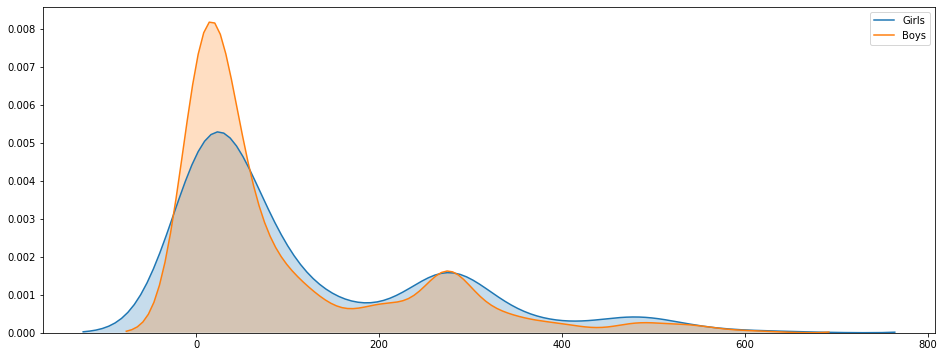

In [799]:
#Hypothesis: girls are earlier to develop language skills and like books than boys and thus more revenues from this group

subscriptions_girls = subscriptions.loc[subscriptions['Child_Gender']=='Girl',:] 
subscriptions_boys = subscriptions.loc[subscriptions['Child_Gender']=='Boy',:] 

plt.figure(figsize=(16, 6))
ax = sns.kdeplot(subscriptions_girls['Total Revenue'], shade = True, label="Girls")
ax = sns.kdeplot(subscriptions_boys['Total Revenue'], shade = True, label="Boys")

plt.legend()
plt.show()

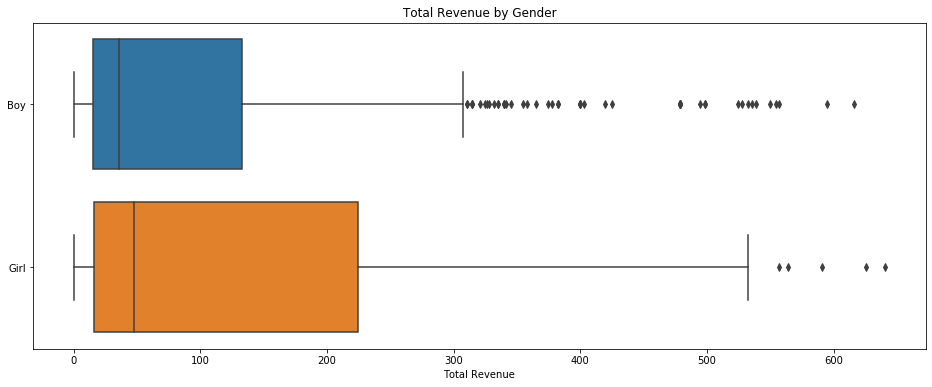

In [800]:
#Revenue by gender
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="Total Revenue", y="Child_Gender", orient="h", data=subscriptions)
#ax = sns.swarmplot(x="PRICE", y="CITY", orient="h", data=redfin, color="white")
ax.set_title("Total Revenue by Gender")
ax.set_ylabel('')

plt.show()

In [801]:
#mean, median and all percentiles are higher for girls but it also have a higher stdev
subscriptions_girls['Total Revenue'].describe()

count    658.000000
mean     118.550608
std      142.334226
min        0.000000
25%       15.960000
50%       48.075000
75%      224.850000
max      640.660000
Name: Total Revenue, dtype: float64

In [802]:
subscriptions_boys['Total Revenue'].describe()

count    631.000000
mean      97.864976
std      129.928706
min        0.000000
25%       14.985000
50%       35.910000
75%      132.700000
max      615.710000
Name: Total Revenue, dtype: float64

In [803]:
#Run a T Test
#Null: the means are the same for girls and boys
#Null is rejected
#This is assuming holding all other variables constant
#A multivariate regression will be more rigorous in controlling other features

from scipy import stats
#np.random.seed(88)

revenue_girls = subscriptions_girls['Total Revenue']
revenue_boys = subscriptions_boys['Total Revenue']

#t, p = stats.ttest_ind(Q2_PRICE,Q4_PRICE)
t, p = stats.ttest_ind(revenue_girls, revenue_boys, equal_var=False)
print("t = " + str(t))
print("p = " + str(p))

t = 2.7269370302021305
p = 0.006479573413229257


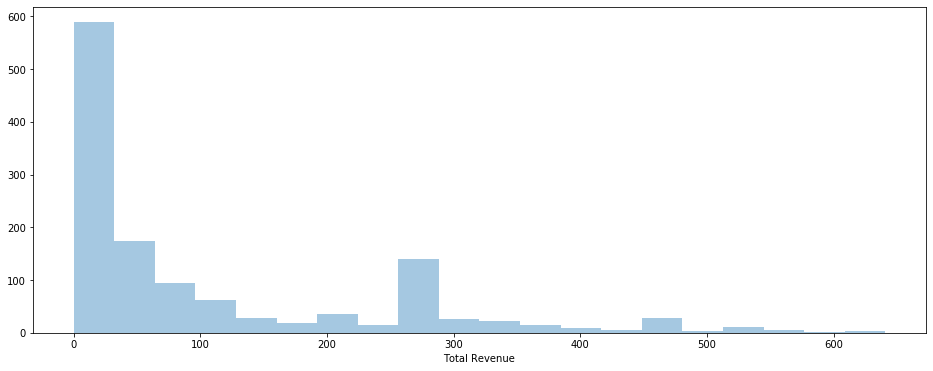

In [804]:
#Plot the distribution of total revenue
#Long tail on the right
#The peak at 275 is the cost of 1 year subscription

plt.figure(figsize=(16, 6))
ax = sns.distplot(subscriptions['Total Revenue'], kde=False)
plt.show()

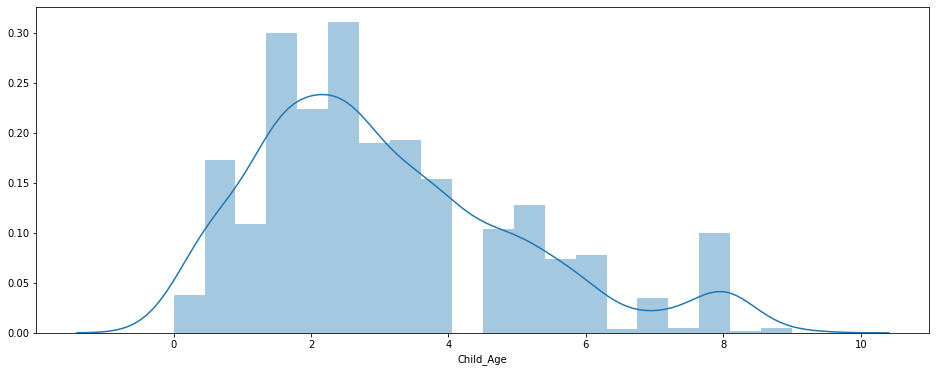

In [805]:
#Plot the distribution of child age
#Long tail on the right
plt.figure(figsize=(16, 6))
ax = sns.distplot(subscriptions['Child_Age'])
plt.show()

In [806]:
subscriptions.head()

,Subscription ID,First Name,Last Name,Email,Status,Total Revenue,Fulfillment Status,Is a Gift,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Initial Order ID,Term,Subscription_Product,Child_Age,Child_Gender,Coupon_Used,Start_Date_dt,End_Date_dt,Cancel_Date_dt,Start_Date_Long,Cancel_Date_Long,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,cancel_date,cancel_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used
0,2739202500,Jennifer,Ting,muchenting@hotmail.com,active,275.00,OPEN,Not_Gift,San Ramon,94583,CA,US,2739202463,12 Month Prepay,0-2 box,1.5,Boy,Used_Coupon,2020-02-11 01:30:24,2021-02-17,,2020-02-11 01:30:24-08:00,,NaN,14.0,11,1,,,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,2733195384,Shen,Qu,aliry111@hotmail.com,active,285.00,OPEN,Not_Gift,Clarksburg,20871,MD,US,2733195305,12 Month Prepay,2-5 box,4.5,Girl,Used_Coupon,2020-02-08 06:30:07,2021-02-17,,2020-02-08 09:30:07-05:00,,NaN,17.0,8,9,,,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,2721329780,Weiyi,Zhen,zhenweiyi@hotmail.com,active,285.00,OPEN,Not_Gift,San Francisco,94112-4264,CA,US,2721329647,12 Month Prepay,0-2 box,2.5,Girl,Not_Used_Coupon,2020-02-02 17:54:50,2021-01-17,,2020-02-02 17:54:50-08:00,,NaN,23.0,2,17,,,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2715898054,Jingwen,Zhen,zjeanwen@hotmail.com,active,18.72,CLOSED,Not_Gift,Chicago,60616,IL,US,2715897946,Month to Month,2-5 box,2.5,Girl,Used_Coupon,2020-01-31 12:54:01,2020-02-17,,2020-01-31 14:54:01-06:00,,NaN,25.0,31,14,,,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,2707797439,Xiaoqi,Wu,lenkywu@gmail.com,active,285.00,OPEN,Not_Gift,Lockport,14094-5716,NY,US,2707797304,12 Month Prepay,0-2 box,1.5,Girl,Not_Used_Coupon,2020-01-29 04:55:18,2021-01-17,,2020-01-29 07:55:18-05:00,,NaN,27.0,29,7,,,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


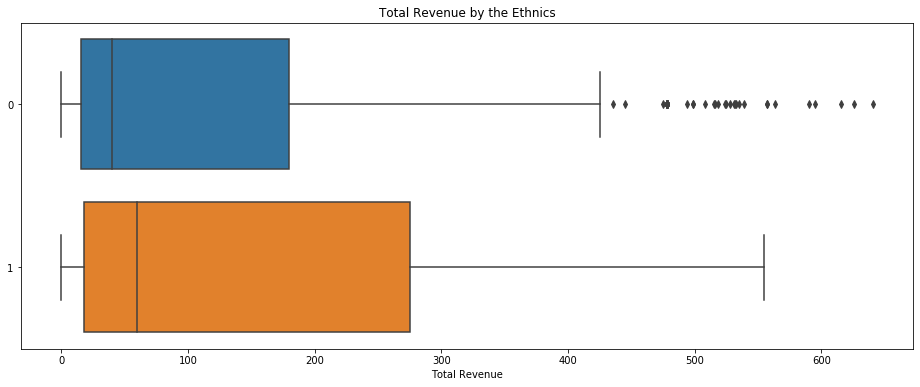

In [807]:
#American families tend to spend more
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="Total Revenue", y="american", orient="h", data=subscriptions)
#ax = sns.swarmplot(x="PRICE", y="CITY", orient="h", data=redfin, color="white")
ax.set_title("Total Revenue by the Ethnics")
ax.set_ylabel('')

plt.show()

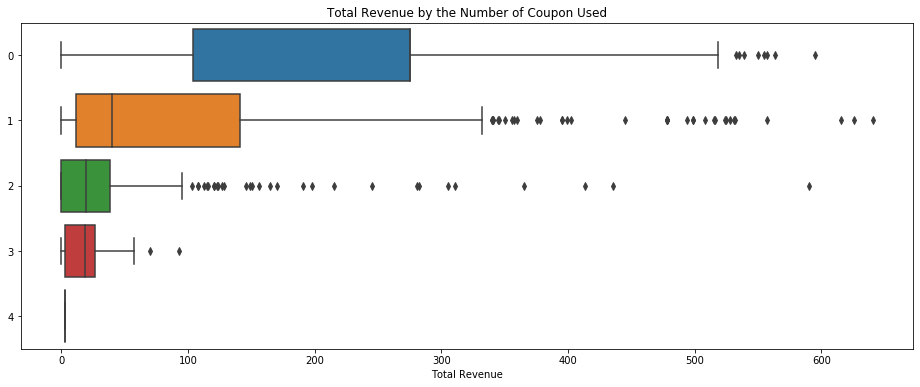

In [808]:
#Revenue by coupon used
#WOW, this is interesting! More coupons used -> less revenue from the customers (obviously but not so obvoiusly)
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="Total Revenue", y="Num_Coupons_Used", orient="h", data=subscriptions)
#ax = sns.swarmplot(x="PRICE", y="CITY", orient="h", data=redfin, color="white")
ax.set_title("Total Revenue by the Number of Coupon Used")
ax.set_ylabel('')

plt.show()

In [809]:
subscriptions.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 0 to 1342
Data columns (total 124 columns):
Subscription ID         1289 non-null int64
First Name              1289 non-null object
Last Name               1282 non-null object
Email                   1289 non-null object
Status                  1289 non-null object
Total Revenue           1289 non-null float64
Fulfillment Status      1289 non-null object
Is a Gift               1289 non-null object
Shipping City           1289 non-null object
Shipping Zip            1289 non-null object
Shipping Province       1289 non-null object
Shipping Country        1289 non-null object
Initial Order ID        1289 non-null int64
Term                    1289 non-null object
Subscription_Product    1289 non-null object
Child_Age               1289 non-null float64
Child_Gender            1289 non-null object
Coupon_Used             1289 non-null object
Start_Date_dt           1289 non-null datetime64[ns]
End_Date_dt             1289 

In [810]:
subscriptions.describe()

,Subscription ID,Total Revenue,Initial Order ID,Child_Age,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used
count,1.289000e+03,1289.000000,1.289000e+03,1289.000000,980.000000,309.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.0,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.0,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.0,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000
mean,2.050825e+09,108.424438,2.050824e+09,3.098324,76.957143,286.569579,14.507370,15.220326,0.052754,0.323507,0.539178,0.137316,0.193949,0.806051,0.239721,0.705198,0.055081,0.228860,0.771140,0.051202,0.948798,0.489527,0.510473,0.010861,0.008534,0.0,0.009310,0.000776,0.001552,0.006982,0.009310,0.002327,0.002327,0.004655,0.002327,0.001552,0.000776,0.003103,0.016292,0.000776,0.000776,0.002327,0.107060,0.002327,0.001552,0.000776,0.005431,0.005431,0.006982,0.001552,0.169899,0.003103,0.000776,0.003103,0.0,0.003879,0.003103,0.080683,0.001552,0.012413,0.003103,0.000776,0.008534,0.013964,0.004655,0.001552,0.000776,0.008534,0.405741,0.000776,0.005431,0.003103,0.000776,0.000776,0.017067,0.000776,0.003103,0.000776,0.036462,0.003103,0.0,0.003103,0.015516,0.000776,0.000776,0.001552,0.000776,0.000776,0.003103,0.001552,0.024050,0.000776,0.002327,0.026377,0.001552,0.014740,0.003103,0.003103,0.001552,0.003879,0.265322,0.646237,1.123351
std,2.703128e+08,136.741522,2.703110e+08,1.927760,98.467886,167.173075,9.695607,5.701519,0.223629,0.467996,0.498656,0.344314,0.395543,0.395543,0.427079,0.456131,0.228228,0.420262,0.420262,0.220496,0.220496,0.500084,0.500084,0.103689,0.092019,0.0,0.096073,0.027853,0.039375,0.083299,0.096073,0.048206,0.048206,0.068093,0.048206,0.039375,0.027853,0.055641,0.126644,0.027853,0.027853,0.048206,0.309309,0.048206,0.039375,0.027853,0.073521,0.073521,0.083299,0.039375,0.375690,0.055641,0.027853,0.055641,0.0,0.062185,0.055641,0.272453,0.039375,0.110762,0.055641,0.027853,0.092019,0.117388,0.068093,0.039375,0.027853,0.092019,0.491225,0.027853,0.073521,0.055641,0.027853,0.027853,0.129573,0.027853,0.055641,0.027853,0.187510,0.055641,0.0,0.055641,0.123641,0.027853,0.027853,0.039375,0.027853,0.027853,0.055641,0.039375,0.153263,0.027853,0.048206,0.16031

In [811]:
#Group by subscription status
#some expired are due to CC expired (a nice way to cancel :()
subscriptions.groupby('Status').size()

Status
active       309
cancelled    909
expired       71
dtype: int64

In [812]:
subscriptions.groupby('Status').mean()

,Subscription ID,Total Revenue,Initial Order ID,Child_Age,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used
Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
active,2.195282e+09,281.873883,2.195277e+09,3.037961,NaN,286.569579,15.333333,14.928803,0.061489,0.213592,0.666667,0.119741,0.653722,0.346278,1.0,0.0,0.0,0.514563,0.485437,0.029126,0.970874,0.404531,0.595469,0.012945,0.009709,0.0,0.006472,0.0000,0.0000,0.009709,0.000000,0.000000,0.0000,0.003236,0.0000,0.006472,0.003236,0.000000,0.016181,0.0000,0.0000,0.003236,0.016181,0.000000,0.0000,0.0000,0.000000,0.009709,0.000000,0.003236,0.022654,0.0000,0.003236,0.006472,0.0,0.009709,0.012945,0.042071,0.0000,0.003236,0.003236,0.0000,0.009709,0.003236,0.006472,0.0000,0.003236,0.003236,0.029126,0.003236,0.009709,0.003236,0.003236,0.003236,0.012945,0.0000,0.0000,0.0000,0.058252,0.012945,0.0,0.0000,0.006472,0.0000,0.000000,0.0000,0.003236,0.0000,0.003236,0.003236,0.042071,0.0000,0.0000,0.093851,0.003236,0.012945,0.003236,0.0000,0.003236,0.000000,0.268608,0.724919,0.540453
cancelled,2.006552e+09,55.050242,2.006552e+09,3.101848,77.854785,NaN,14.272827,15.381738,0.052805,0.358636,0.498350,0.143014,0.048405,0.951595,0.0,1.0,0.0,0.135314,0.864686,0.003300,0.996700,0.514851,0.485149,0.008801,0.008801,0.0,0.011001,0.0011,0.0022,0.006601,0.012101,0.002200,0.0033,0.005501,0.0033,0.000000,0.000000,0.003300,0.015402,0.0011,0.0011,0.002200,0.145215,0.002200,0.0022,0.0011,0.006601,0.004400,0.009901,0.001100,0.211221,0.0044,0.000000,0.002200,0.0,0.002200,0.000000,0.096810,0.0022,0.015402,0.002200,0.0011,0.008801,0.012101,0.004400,0.0022,0.000000,0.011001,0.513751,0.000000,0.004400,0.003300,0.000000,0.000000,0.019802,0.0011,0.0044,0.0011,0.029703,0.000000,0.0,0.0044,0.019802,0.0011,0.000000,0.0022,0.000000,0.0011,0.003300,0.001100,0.016502,0.0011,0.0033,0.005501,0.001100,0.015402,0.003300,0.0044,0.001100,0.004400,0.270627,0.608361,1.303630
expired,1.988956e+09,36.892958,1.988956e+09,3.315915,65.464789,NaN,13.915493,14.422535,0.014085,0.352113,0.507042,0.140845,0.056338,0.943662,0.0,0.0,1.0,0.183099,0.816901,0.760563,0.239437,0.535211,0.464789,0.028169,0.000000,0.0,0.000000,0.0000,0.0000,0.000000,0.014085,0.014085,0.0000,0.000000,0.0000,0.000000,0.000000,0.014085,0.028169,0.0000,0.0000,0.000000,0.014085,0.014085,0.0000,0.0000,0.014085,0.000000,0.000000,0.000000,0.281690,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.042254,0.0000,0.014085,0.014085,0.0000,0.000000,0.084507,0.000000,0.0000,0.000000,0.000000,0.661972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.028169,0.000000,0.0,0.0000,0.000000,0.0000,0.014085,0.0000,0.000000,0.0000,0.000000,0.000000,0.042254,0.0000,0.0000,0.000000,0.000000,0.014085,0.000000,0.0000,0.000000,0.014085,0.183099,0.788732,1.352113


In [813]:

#lengh of subscription AND revenue total
#Someone who is canceled but subscribed for a long time vs. someone who just subscribed 1 month

In [814]:
#Cancellation Data
cancellations = pd.read_csv(data_path + "Subscription/cancellations.csv", encoding="utf8")
cancellations.head(2)

,id,customer_id,first_name,last_name,name,email,phone_number,log_type,product_names,product_ids,subscription_id,subscription_term,subscription_start_date,cancel_reason,note,log_time,ship_to,ship_street,ship_unit,ship_city,ship_state,ship_zip_code,ship_country,location,country,months_subscribed
0,2739933823,1938363638,Yuehua,Fang,Yuehua Fang,personalfang@gmail.com,NaN,cancelled,"2-5岁熊猫盒子, 2-5岁熊猫盒子, 2-5岁熊猫盒子","2010794217, 2010794217, 2010794217",2566554451,Month to Month,2019-11-27T07:12:33Z,did_not_like_product,Do not like the March box,2020-02-11T11:35:23Z,Yuehua Fang,3146 Golfview Dr.,NaN,Saline,MI,48176,US,"MI, US",US,3
1,2738849995,2411096922,Yue,Zhao,Yue Zhao,hellozhaoyue@gmail.com,NaN,cancelled,"0-2岁熊猫盒子, 0-2岁熊猫盒子","2005236928, 2005236928",2411097273,12 Month Prepay,2019-09-15T22:30:17Z,resubscribe_later,Allow change age range within yearly subscript...,2020-02-10T23:27:30Z,Yue Zhao,2133 cook drive,NaN,Easton,PA,18045,US,"PA, US",US,5


In [815]:
cancel_reason_count = cancellations.groupby('cancel_reason').size().sort_values(ascending=False)

cancel_reason_count/cancel_reason_count.sum()

cancel_reason
resubscribe_later       0.292233
test_it_out             0.182524
other                   0.180583
did_not_like_product    0.071845
gift                    0.061165
prevent_renewal         0.046602
not_worth_price         0.041748
accidental_order        0.039806
trying_other_service    0.033010
merchant_cancelled      0.021359
other_service_issue     0.015534
shipping_issues         0.011650
fraud                   0.000971
billed_twice            0.000971
dtype: float64

In [816]:
#Cancellation reason notes
#potentially can do some NLP analysis

In [817]:
cancellations.shape

(1101, 26)

In [888]:
subscriptions[100:]

,Subscription ID,First Name,Last Name,Email,Status,Total Revenue,Fulfillment Status,Is a Gift,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Initial Order ID,Term,Subscription_Product,Child_Age,Child_Gender,Coupon_Used,Start_Date_dt,End_Date_dt,Cancel_Date_dt,Start_Date_Long,Cancel_Date_Long,canceled_tenure,active_tenure,subscribe_date,subscribe_hour,cancel_date,cancel_hour,american,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Not_Used_Coupon,Used_Coupon,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY,PAYPAL,STRIPE,Num_Coupons_Used
104,2565195172,Kai,Zhuo,kevinz1984@hotmail.com,cancelled,14.97,CLOSED,Not_Gift,San Francisco,94112,CA,US,2565192655,Month to Month,0-2 box,1.50,Boy,Used_Coupon,2019-11-26 18:43:03,2019-12-23,2019-12-16 14:05:33,2019-11-26 18:43:03-08:00,2019-12-16 14:05:33-08:00,19.0,NaN,26,18,16,14,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
105,2556153189,Mi,Li,amyli198777@yahoo.com,cancelled,19.96,CLOSED,Not_Gift,Galena,61036,IL,US,2556153082,Month to Month,5+ box,5.50,Girl,Used_Coupon,2019-11-22 10:29:40,2019-12-23,2019-12-22 19:15:21,2019-11-22 12:29:40-06:00,2019-12-22 21:15:21-06:00,30.0,NaN,22,12,22,21,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
107,2555342009,Teng,NaN,tristanjess@yahoo.com,active,69.86,CLOSED,Not_Gift,Overland Park,66085,KS,US,2555341954,Month to Month,2-5 box,5.50,Girl,Used_Coupon,2019-11-22 04:55:44,2020-03-17,,2019-11-22 06:55:44-06:00,,NaN,95.0,22,6,,,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
108,2554811311,Yaogong,Wang,wygivan@hotmail.com,cancelled,24.90,CLOSED,Not_Gift,Millbrae,94030,CA,US,2554811217,Month to Month,5+ box,4.50,Boy,Used_Coupon,2019-11-21 21:18:16,2020-01-17,2020-01-14 15:00:51,2019-11-21 21:18:16-08:00,2020-01-14 15:00:51-08:00,53.0,NaN,21,21,14,15,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
109,2551226053,Huan,zhao,06zhaohuan@gmail.com,cancelled,4.95,CLOSED,Not_Gift,Issaquah,98029,WA,US,2551224013,Month to Month,2-5 box,2.50,Boy,Used_Coupon,2019-11-20 11:31:45,2019-12-17,2019-11-20 11:33:07,2019-11-20 11:31:45-08:00,2019-11-20 11:33:07-08:00,0.0,NaN,20,11,20,11,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
110,2551294216,Edward,Baker,edward.scott.baker@gmail.com,active,275.00,OPEN,Not_Gift,Cambridge,2138,MA,US,2551294008,12 Month Prepay,2-5 box,4.50,Boy,Not_Used_Coupon,2019-11-20 12:09:36,2020-11-17,,2019-11-20 15:09:36-05:00,,NaN,97.0,20,15,,,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
111,2

In [904]:
#box content data
box = pd.read_csv(data_path + "Subscription/box.csv", encoding="utf8")
box = box.fillna(0)
box['Day'] = 15

In [905]:
box['Time']= pd.to_datetime(box[['Year','Month','Day']])
box.head()

,Year,Month,Age,Theme,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost,Day,Time
0,2018,9,0-2 box,Moon,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,46.00,15,2018-09-15
1,2018,9,2-5 box,Moon,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.00,15,2018-09-15
2,2018,9,5+ box,Moon,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,52.50,15,2018-09-15
3,2018,10,0-2 box,Halloween,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,67.20,15,2018-10-15
4,2018,10,2-5 box,Halloween,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,65.83,15,2018-10-15


In [906]:
subscriptions['end_date_all'] = subscriptions['End_Date_dt']
subscriptions.loc[subscriptions['Cancel_Date_dt']!='','end_date_all'] = subscriptions.loc[subscriptions['Cancel_Date_dt']!='','Cancel_Date_dt']
subscriptions = subscriptions.reset_index()

ValueError: cannot insert level_0, already exists

In [914]:
#for index, row in subscriptions.iterrows():
    
start_date = subscriptions.loc[600,'Start_Date_dt']
end_date = subscriptions.loc[600,'Cancel_Date_dt']
age_group = subscriptions.loc[600,'Subscription_Product']

box_received = box.loc[(box['Age']==age_group) & (box['Time']<=end_date) & (box['Time']>=start_date),
       'num_hardcover':'cost']


,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost
13,3.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,53.54
16,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,41.80
19,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,43.25


In [918]:

box_received = box.loc[(box['Age']==age_group) & (box['Time']<=end_date) & (box['Time']>=start_date),
       'num_hardcover':'cost']
avg_box = box_received.mean(axis=0)
last_box = box_received.iloc[-1:,]

,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost
19,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,43.25


In [ ]:
box.shape

In [ ]:
#Feedback detail data
feedback_detail = pd.read_csv(data_path + "Subscription/feedback_detail.csv", encoding="utf8")
feedback_detail.head(2)

In [ ]:
feedback_detail.shape

In [ ]:
#One-time Order Data
onetime_order = pd.read_csv(data_path + "Subscription/onetimeorder.csv", encoding="utf8")
onetime_order.head(2)

In [ ]:
onetime_order.shape

In [ ]:
#One-time Order Revenue Data
onetime_order_revenue = pd.read_csv(data_path + "Subscription/onetimeorder_revenue.csv", encoding="utf8")
onetime_order_revenue.head(2)

In [ ]:
onetime_order_revenue.shape

In [ ]:
#notification Data
notifications = pd.read_csv(data_path + "Subscription/notifications.csv", encoding="utf8")
notifications.head(2)

In [ ]:
notifications.shape

In [ ]:
#coupon Data
coupons = pd.read_csv(data_path + "Subscription/coupon_revenue.csv", encoding="utf8")
coupons.head(2)

In [ ]:
coupons.shape